## Space Ship Titanic

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



In [248]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder#

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import tree


### Data Description

In [249]:
df_train = pd.read_csv('train.csv')

In [250]:
df_test = pd.read_csv('test.csv')


| Column Name | Description |
|-------------|-------------|
| PassengerId | A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always. |
| HomePlanet | The planet the passenger departed from, typically their planet of permanent residence. |
| CryoSleep | Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins. |
| Cabin | The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard. |
| Destination | The planet the passenger will be debarking to. |
| Age | The age of the passenger. |
| VIP | Whether the passenger has paid for special VIP service during the voyage. |
| RoomService, FoodCourt, ShoppingMall, Spa, VRDeck | Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. |
| Name | The first and last names of the passenger. |
| Transported | Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict. |


In [251]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [252]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [253]:
df_train.shape

(8693, 14)

In [254]:
df_test.shape

(4277, 13)

In [255]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [256]:
df_test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [257]:
df_train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [258]:
df_train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [259]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Reaseach Questions



1. Planet and destination: What is the distribution of passengers' home planets and their corresponding destinations? 

2. Planet and VIP Spending: How does the spending behavior of passengers on various luxury amenities differ based on their home planet?

3. Amount of people transported: What is the total number of passengers who were transported to another dimension?.

4. Difference: Transported Cryosleep (Yes/No): Is there a significant difference in the proportion of passengers who were transported to another dimension based on whether they elected to undergo cryosleep or not? 

5. Influence of Cabin: Does the assigned cabin (deck/num/side) have an impact on whether a passenger was transported or not? 

6. How many familys survived.

7. How many VIP Passangers survived?

## Destination according to Homeplanet

In [260]:
value_counts = df_train['Destination'].value_counts()
value_counts

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [261]:
fig = px.bar(df_test, x = 'HomePlanet', y = 'PassengerId',
                     hover_name = 'Destination',color = 'Destination')

fig.update_layout(
    title='Destination sorted by HomePlanet',
    barmode='stack',  # Use 'stack' to stack bars similar to the second plot
    plot_bgcolor='white',  # Set the background color of the plot
    paper_bgcolor='white'  # Set the background color of the paper (plot area)
)

fig.show()

## Planet and VIP Spending

In [262]:
fig = px.bar(df_test, x = 'HomePlanet', y = 'PassengerId',
                     hover_name = 'VIP',color = 'VIP')



fig.update_layout(
    title='Destination and VIP Spending',
    barmode='stack',  # Use 'stack' to stack bars similar to the second plot
    plot_bgcolor='white',  # Set the background color of the plot
    paper_bgcolor='white'  # Set the background color of the paper (plot area)
)


fig.show()

In [263]:
spending = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
grouped = df_train.groupby('HomePlanet')[spending].sum()

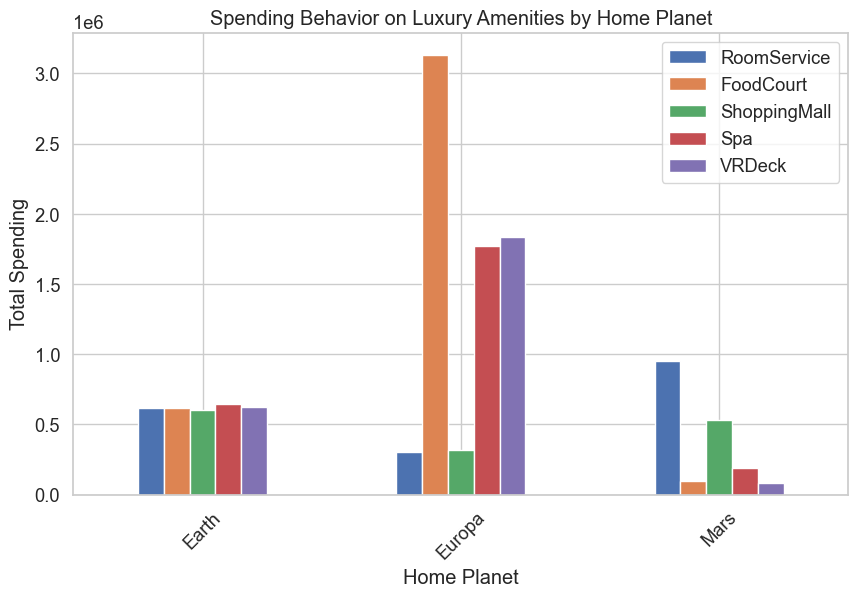

In [264]:
grouped.plot(kind='bar', figsize=(10, 6))
plt.title("Spending Behavior on Luxury Amenities by Home Planet")
plt.xlabel("Home Planet")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


## How many people were transported into another dimension?

In [265]:
value_counts = df_train['Transported'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=['Not Transported', 'Transported'],
    values=value_counts,
    hole=0.4,  # Set the hole size for a donut chart effect
    marker=dict(colors=['#1f77b4', '#ff7f0e'])  # Customize the colors for each section
)])
fig.update_layout(
    title='Distribution of transported passengers',
    title_x=0.5,  # Align the title to the center
    font=dict(size=16)  # Increase font size for readability
)
fig.show()

## Difference: Transported Cryosleep 

In [266]:
cryosleep_survived = df_train.groupby(['CryoSleep','Transported'])['Transported'].count()
cryosleep_survived

CryoSleep  Transported
False      False          3650
           True           1789
True       False           554
           True           2483
Name: Transported, dtype: int64

In [267]:
fig = px.bar(cryosleep_survived,
             x=cryosleep_survived.index.get_level_values(0),
             y='Transported',
             title="Transported vs. Survived by Cryosleep",
             color=cryosleep_survived.index.get_level_values(1).map({True: 'Transported', False: 'Survived'}),
             barmode='stack',
             labels={'x': 'Cryosleep', 'Transported': 'Count'},
             category_orders={"x": sorted(df_train['CryoSleep'].unique())},
             color_discrete_map={'Transported': 'blue', 'Survived': 'red'})

fig.show()

## Influence of Cabin

In [268]:
def cabin_to_side(cabin):
    if isinstance(cabin, str):
        if 'S' in cabin:
            return 'Starboard'
        elif 'P' in cabin:
            return 'Port'
    return np.nan

df_train['CabinSide'] = df_train['Cabin'].apply(cabin_to_side)


In [269]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Port
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Starboard
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Starboard
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Starboard
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Starboard


In [270]:
cabin_survived = df_train.groupby(['CabinSide', 'Transported'])['Transported'].count()
cabin_survived

CabinSide  Transported
Port       False          2308
           True           1898
Starboard  False          1908
           True           2380
Name: Transported, dtype: int64

In [271]:
df_train['CabinSide'] = df_train['Cabin'].apply(cabin_to_side)

cabin_survived = df_train.groupby(['CabinSide', 'Transported'])['Transported'].count()

fig = px.bar(cabin_survived,
             x=cabin_survived.index.get_level_values(0),
             y='Transported',
             title="Transported vs. Survived by Cabin Side",
             color=cabin_survived.index.get_level_values(1).map({True: 'Transported', False: 'Not Transported'}),
             barmode='stack',
             labels={'x': 'Cabin Side', 'Transported': 'Count'},
             category_orders={"x": ["Starboard", "Port"]},
             color_discrete_map={'Transported': 'blue', 'Not Transported': 'red'})

fig.show()

## How many groups/families survived.

In [272]:
def extract_group(id):
    group = id.split("_")[0]
    return float(group)

In [273]:
df_train['groups'] = df_train['PassengerId'].apply(extract_group)
df_groups= df_train.groupby(['groups','Transported'])['Transported'].count()
df_groups

groups  Transported
1.0     False          1
2.0     True           1
3.0     False          2
4.0     True           1
5.0     True           1
                      ..
9276.0  False          1
9278.0  False          1
9279.0  True           1
9280.0  False          1
        True           1
Name: Transported, Length: 7014, dtype: int64

In [274]:
df_groups = df_train.groupby(['groups', 'Transported'])['Transported'].count()


In [275]:
fig = go.Figure()

# Add the trace for families with at least one member survived
at_least_one_survived = df_groups[df_groups == 1].reset_index(level=1, drop=True)
fig.add_trace(go.Scatter(
    x=at_least_one_survived.index,
    y=at_least_one_survived,
    mode='markers',
    name='At least one member survived',
    marker=dict(color='blue', size=10)
))

# Add the trace for families where all members did not survive
none_survived = df_groups[df_groups == 0].reset_index(level=1, drop=True)
fig.add_trace(go.Scatter(
    x=none_survived.index,
    y=none_survived,
    mode='markers',
    name='All members did not survive',
    marker=dict(color='red', size=10)
))

# Add the trace for families where everyone survived
all_survived = df_groups[df_groups.index.isin(df_groups[df_groups > 1].index)].reset_index(level=1, drop=True)
fig.add_trace(go.Scatter(
    x=all_survived.index,
    y=all_survived,
    mode='markers',
    name='All members survived',
    marker=dict(color='green', size=10)
))

# Set the chart title and axis labels
fig.update_layout(
    title="Number of Families Survived",
    xaxis_title="Family Group",
    yaxis_title="Count",
    showlegend=True
)

# Show the plot
fig.show()


### Transportation VIP

In [276]:
fig = px.bar(df_train, x = 'Transported', y = 'PassengerId',
                     hover_name = 'VIP',color = 'VIP')

fig.update_layout(
    title='Transportation VIP Status',
    xaxis_title='Transported',
    yaxis_title='PassengerId',
    barmode='stack',  
    plot_bgcolor='white', 
    paper_bgcolor='white'  
)

fig.show()


## Predicting, who is transported 

In [277]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinSide,groups
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Port,1.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Starboard,2.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Starboard,3.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Starboard,3.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Starboard,4.0


### Correlations

In [278]:
train_num = df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
train_cat = df_train[['Transported','CabinSide','Destination','VIP','HomePlanet','groups','CryoSleep',]]

In [279]:
df_train=pd.get_dummies(df_train[['Transported', 'CabinSide', 'Destination', 'VIP', 'HomePlanet', 'groups', 'CryoSleep']])
train_cat_encoded = df_train

<__array_function__ internals>:200: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



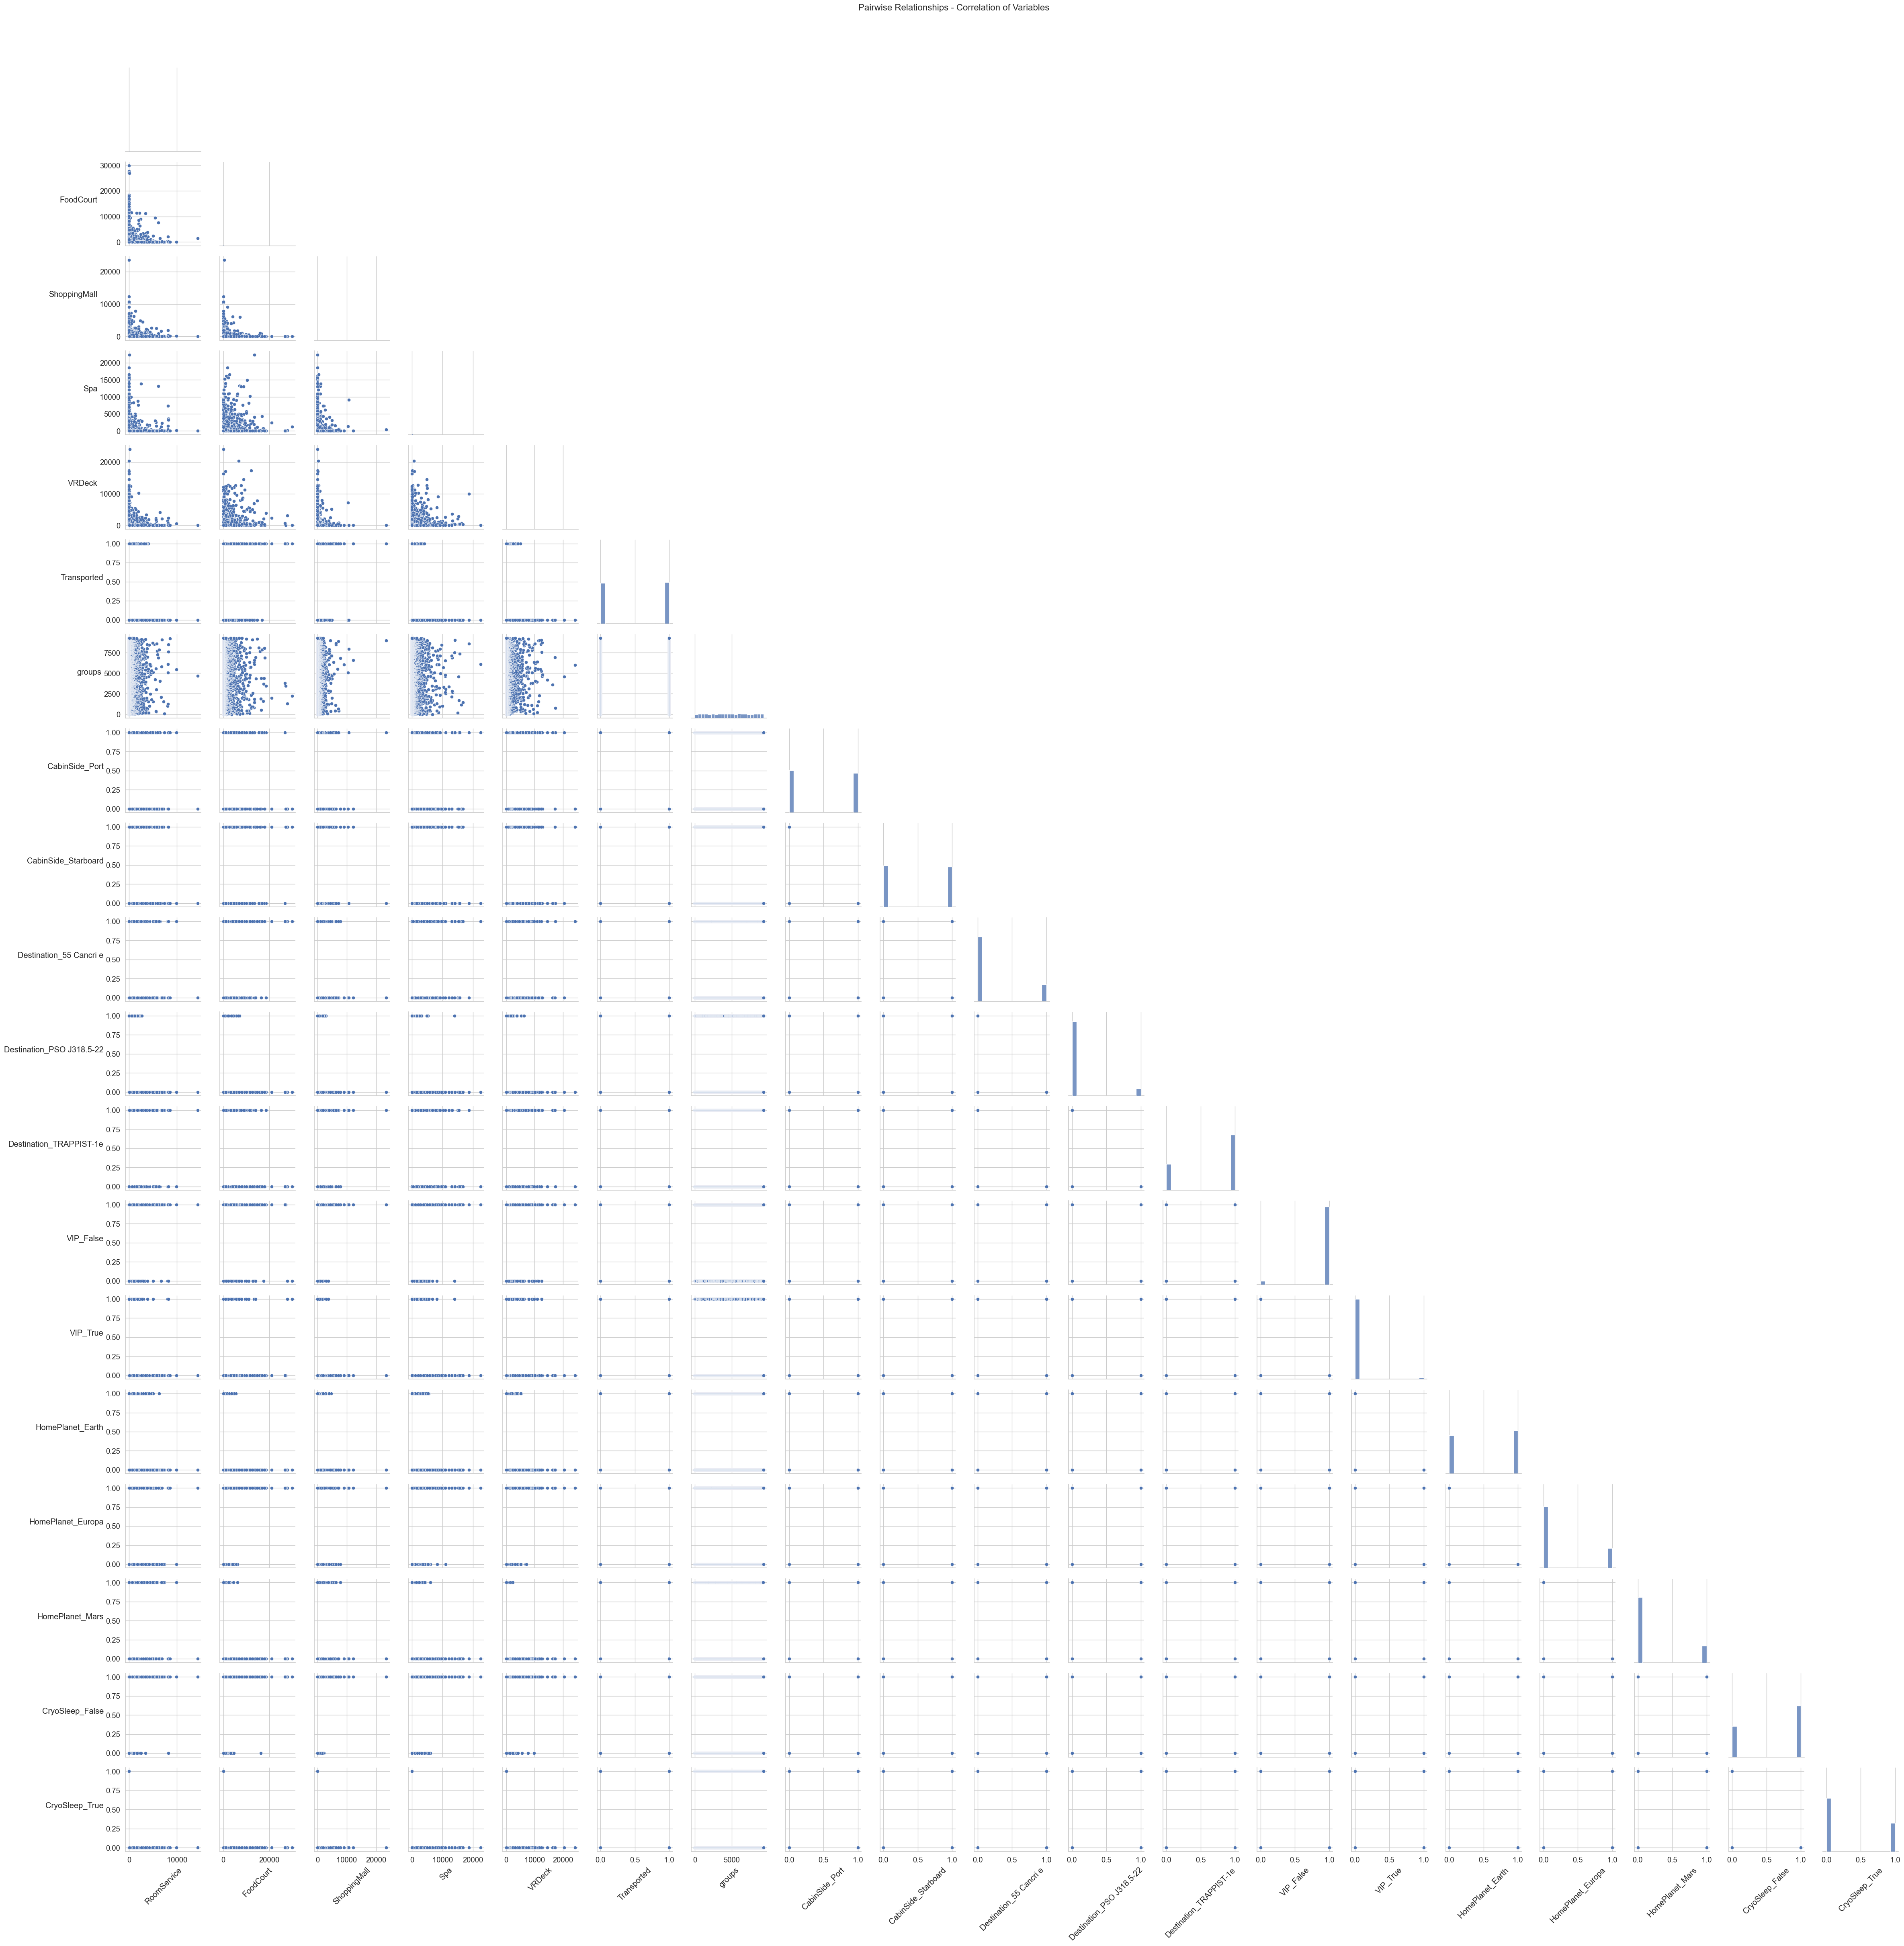

In [280]:
# Calculate the correlation matrix
correlation_matrix = train_all.corr()

# Create a pairplot to visualize the pairwise relationships
sns.set(style='whitegrid', font_scale=1.2)
pairplot = sns.pairplot(train_all, corner=True)

# Rotate x-axis labels for better visibility (if subplot is not None)
for ax in pairplot.axes.flat:
    if ax is not None:
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

plt.suptitle("Pairwise Relationships - Correlation of Variables", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [281]:
train_all = pd.concat([train_num, train_cat_encoded], axis=1)

In [282]:
correlation_with_transported = train_all.corr()['Transported'].sort_values(ascending=False)

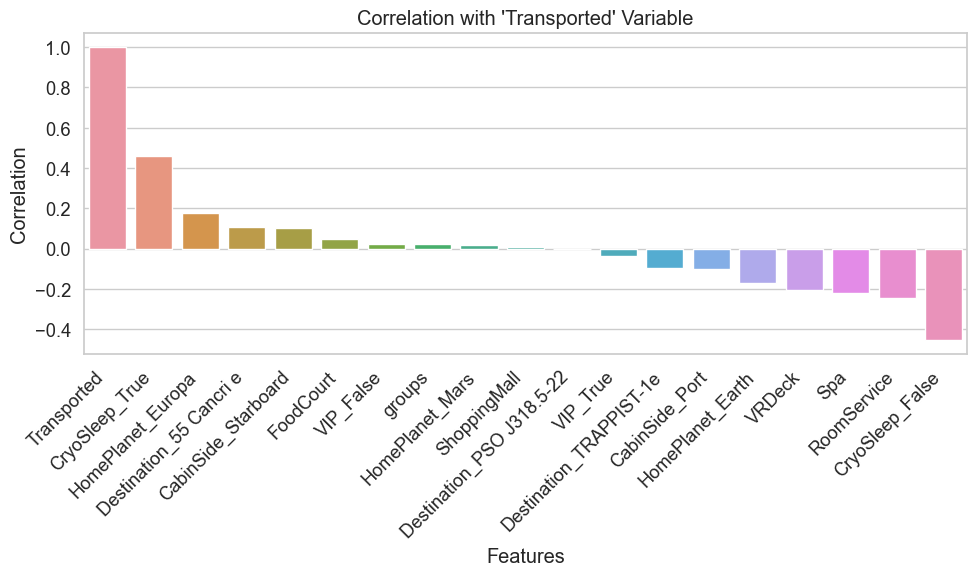

In [283]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_transported.index, y=correlation_with_transported.values)
plt.xticks(rotation=45, ha='right')
plt.title("Correlation with 'Transported' Variable")
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

Since the heatmap was too crowded, I opted for a barchart instead to show me the correlations to transported


### Data Cleaning

In [284]:
df_train[df_train.isna().any(axis=1)]


,Transported,groups,CabinSide_Port,CabinSide_Starboard,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True


In [285]:
df_train.dropna(axis=0, inplace=True)


In [286]:
df_train[df_train.isna().any(axis=1)]

,Transported,groups,CabinSide_Port,CabinSide_Starboard,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True


In [287]:
df_train.head()

,Transported,groups,CabinSide_Port,CabinSide_Starboard,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True
0,False,1.0,1,0,0,0,1,1,0,0,1,0,1,0
1,True,2.0,0,1,0,0,1,1,0,1,0,0,1,0
2,False,3.0,0,1,0,0,1,0,1,0,1,0,1,0
3,False,3.0,0,1,0,0,1,1,0,0,1,0,1,0
4,True,4.0,0,1,0,0,1,1,0,1,0,0,1,0


In [288]:
df_test[df_test.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
11,0040_01,Europa,False,D/2/P,TRAPPIST-1e,45.0,False,932.0,74.0,NaN,7.0,1010.0,Antino Pinoffent
15,0046_02,Earth,False,F/11/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,903.0,NaN,Glene Powery
18,0047_02,Europa,False,NaN,TRAPPIST-1e,29.0,False,0.0,7708.0,243.0,569.0,343.0,Muons Prucerod
19,0047_03,Europa,False,B/0/S,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez
4267,9260_01,Earth,True,G/1503/P,55 Cancri e,3.0,NaN,0.0,0.0,0.0,0.0,0.0,Luisy Portananney
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [289]:
df_test.dropna(axis=0, inplace=True)

### Data Splitting and Training the Model

In [290]:
x = df_train[['CryoSleep_True','HomePlanet_Europa']]
y = df_train['Transported']
print(f'{x}, {y}')

      CryoSleep_True  HomePlanet_Europa
0                  0                  1
1                  0                  0
2                  0                  1
3                  0                  1
4                  0                  0
...              ...                ...
8688               0                  1
8689               1                  0
8690               0                  0
8691               0                  1
8692               0                  1

[8693 rows x 2 columns], 0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool


In [291]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.20)


In [292]:
print(f"x.shape: {x.shape}, train_X.shape: {train_X.shape}, y.shape: {y.shape}, train_y.shape: {train_y.shape}")

x.shape: (8693, 2), train_X.shape: (6954, 2), y.shape: (8693,), train_y.shape: (6954,)


In [293]:
x[x.isna().any(axis=1)]


,CryoSleep_True,HomePlanet_Europa


In [294]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_y)

In [295]:
verification_output=clf.predict(test_X)

In [296]:
print(verification_output)

[False False  True ...  True  True False]


In [297]:
verification_output.shape

(1739,)

In [298]:
type(test_y)

pandas.core.series.Series

In [299]:

arr = np.array(test_y)

# Print the array
print(test_y)


6739    False
1092    False
6620     True
4916     True
4444     True
        ...  
5615     True
3767     True
7239     True
877      True
1039    False
Name: Transported, Length: 1739, dtype: bool


In [300]:
print(test_y)

6739    False
1092    False
6620     True
4916     True
4444     True
        ...  
5615     True
3767     True
7239     True
877      True
1039    False
Name: Transported, Length: 1739, dtype: bool


In [301]:
df_test[df_test.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name


In [302]:
df_test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [303]:
df_test = pd.get_dummies(df_test, columns = ['Cabin','HomePlanet', 'Destination', 'VIP', 'CryoSleep'])

In [304]:
df_test.dtypes

PassengerId                 object
Age                        float64
RoomService                float64
FoodCourt                  float64
ShoppingMall               float64
                            ...   
Destination_TRAPPIST-1e      uint8
VIP_False                    uint8
VIP_True                     uint8
CryoSleep_False              uint8
CryoSleep_True               uint8
Length: 2691, dtype: object

In [305]:
xtest = df_test[['CryoSleep_True','HomePlanet_Europa']]
print(xtest)

      CryoSleep_True  HomePlanet_Europa
0                  1                  0
1                  0                  0
2                  1                  1
3                  0                  1
4                  0                  0
...              ...                ...
4269               1                  0
4270               0                  0
4271               0                  0
4272               1                  0
4276               1                  0

[3281 rows x 2 columns]


In [306]:
test_output=clf.predict(xtest)
print(test_output)

[ True False  True ... False  True  True]


In [307]:
if np.array_equal(test_y, verification_output):
    j = len(test_y)
else:
    j = np.sum(test_y == verification_output)

percentage = j / len(test_y) * 100
print("Percentage of proper prediction: %d" % percentage)

Percentage of proper prediction: 71


## Plotting of desicion tree

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.5\nsamples = 6954\nvalue = [3469, 3485]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\ngini = 0.444\nsamples = 4539\nvalue = [3029, 1510]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.428\nsamples = 3573\nvalue = [2463, 1110]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.485\nsamples = 966\nvalue = [566, 400]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\ngini = 0.298\nsamples = 2415\nvalue = [440, 1975]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.379\nsamples = 1696\nvalue = [430, 1266]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.027\nsamples = 719\nvalue = [10, 709]')]

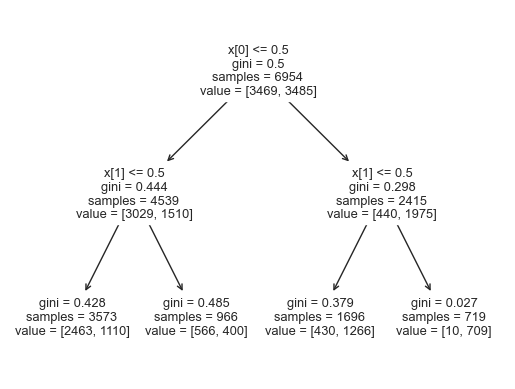

In [308]:
tree.plot_tree(clf)


## Sources

https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook

https://www.youtube.com/watch?v=PHxYNGo8NcI&ab_channel=codebasics

Datenanalyse mit Python, Auswertung von Daten mit Pandas, Numpy und IPython

https://scikit-learn.org/stable/modules/tree.html#classification
